In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
df = pd.read_csv("machine_usage_10_machines.csv")

# From this page: https://github.com/alibaba/clusterdata/blob/master/cluster-trace-v2018/schema.txt
df.columns = ["machine_id", "time_stamp", "cpu_util_percent", "mem_util_percent", "mem_gps", "mkpi", "net_in", "net_out", "disk_io_percent"]

df.head()

,machine_id,time_stamp,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,m_1932,386670,43,92,NaN,NaN,43.04,33.08,5
1,m_1932,386690,44,92,NaN,NaN,43.05,33.08,5
2,m_1932,386800,46,92,NaN,NaN,43.05,33.08,3
3,m_1932,386930,44,93,NaN,NaN,43.05,33.09,4
4,m_1932,387000,41,93,NaN,NaN,43.05,33.09,4


In [50]:
df = df.drop(columns=["mem_util_percent", "mem_gps", "mkpi", "net_in", "net_out", "disk_io_percent"])

In [78]:
# Create separate dataframes per machine

dfs = {key: grp for key, grp in df.groupby("machine_id")}

for key in dfs:
    dfs[key] = dfs[key].drop(columns=["machine_id"])
    print(key + ":")
    print(dfs[key].head())
    print()



m_1932:
   time_stamp  cpu_util_percent
0      386670                43
1      386690                44
2      386800                46
3      386930                44
4      387000                41

m_1933:
      time_stamp  cpu_util_percent
3324         140                 5
3325         180                 5
3326         250                 6
3327         430                 5
3328         500                 5

m_1934:
       time_stamp  cpu_util_percent
10517        2560                34
10518        2580                35
10519        2640                27
10520        2800                24
10521        2840                25

m_1935:
       time_stamp  cpu_util_percent
17392         160                13
17393         340                18
17394         450                39
17395         460                38
17396         520                34

m_1936:
       time_stamp  cpu_util_percent
24340        2500                26
24341        2590                20
24342        2

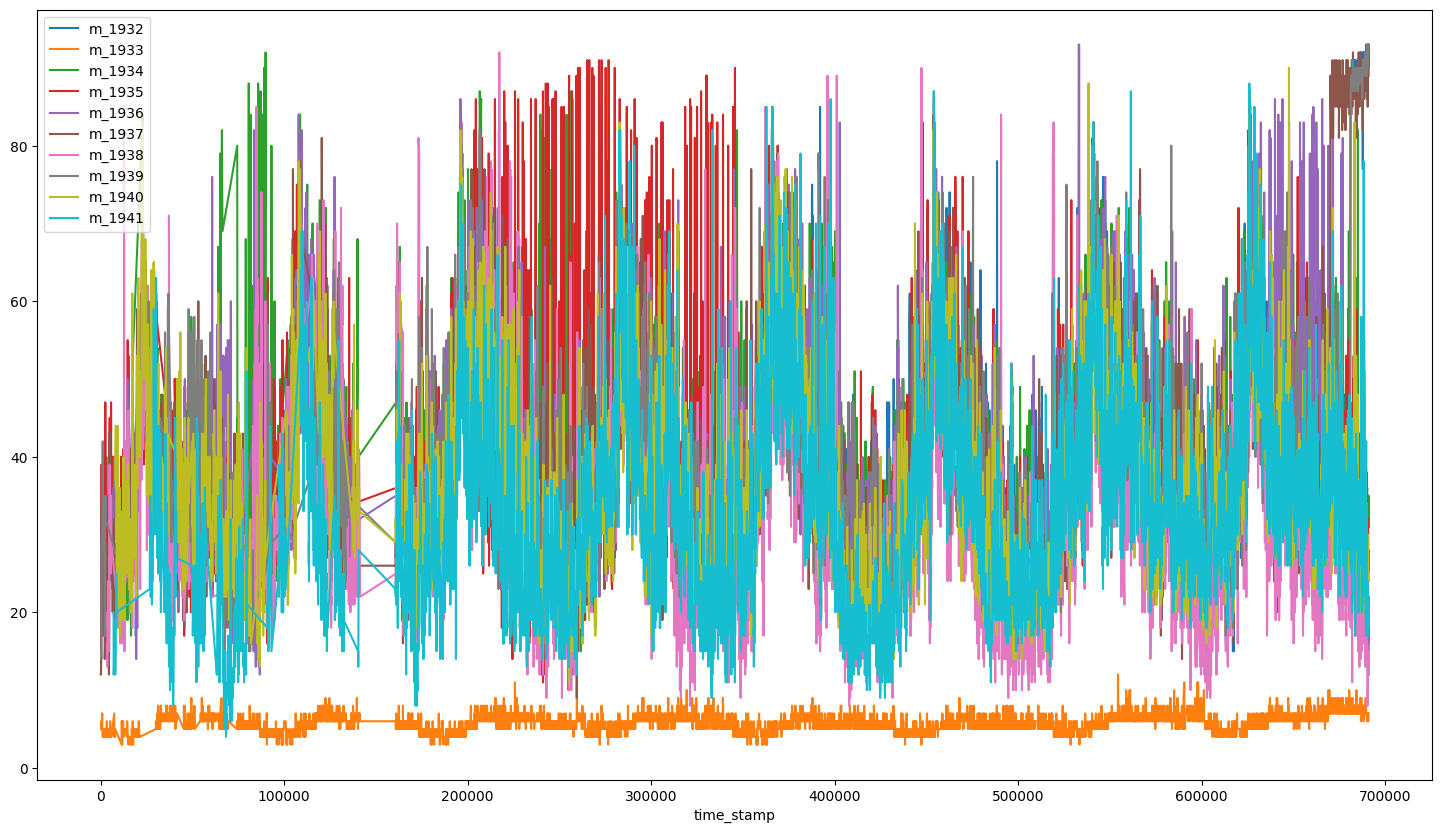

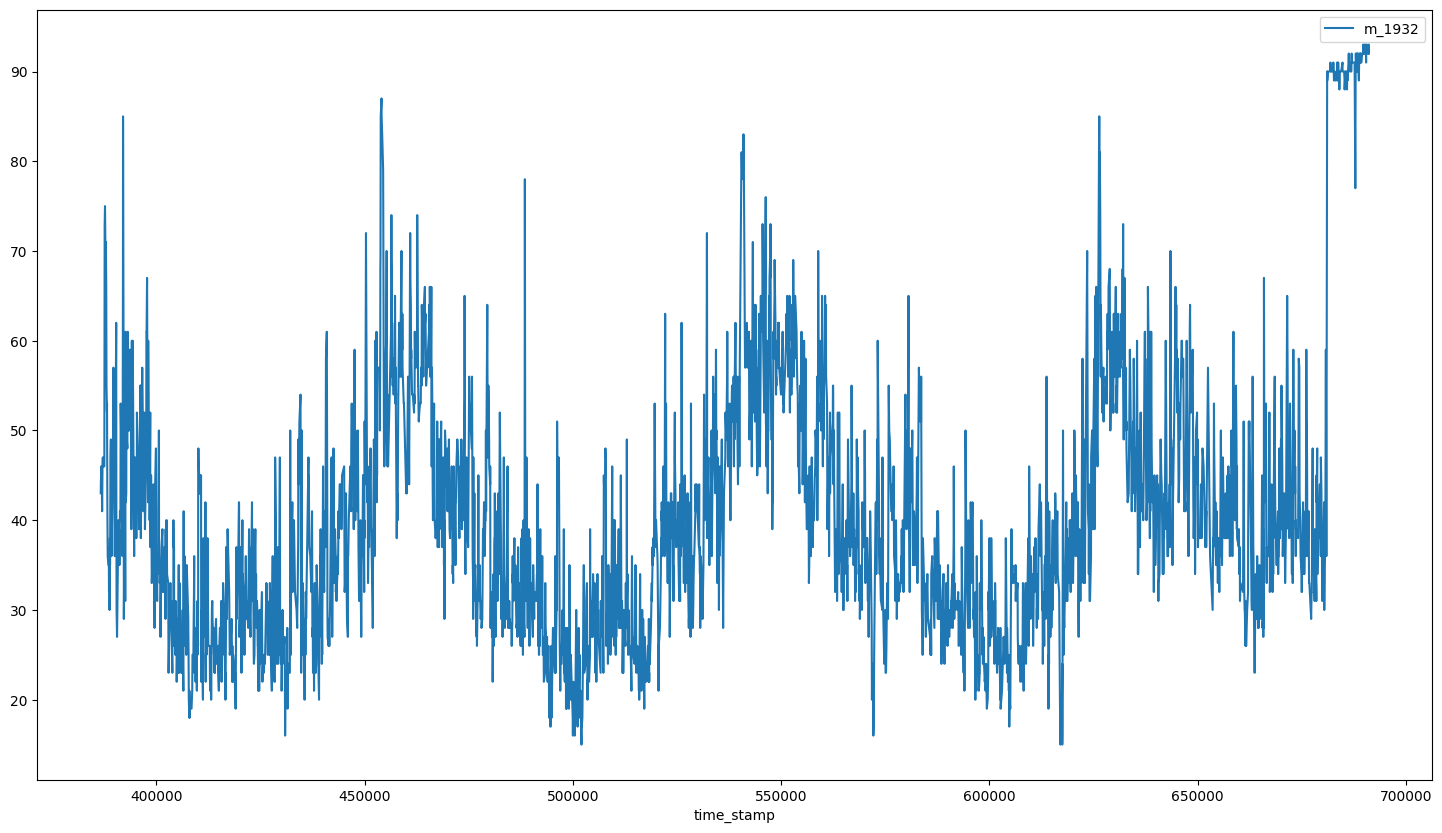

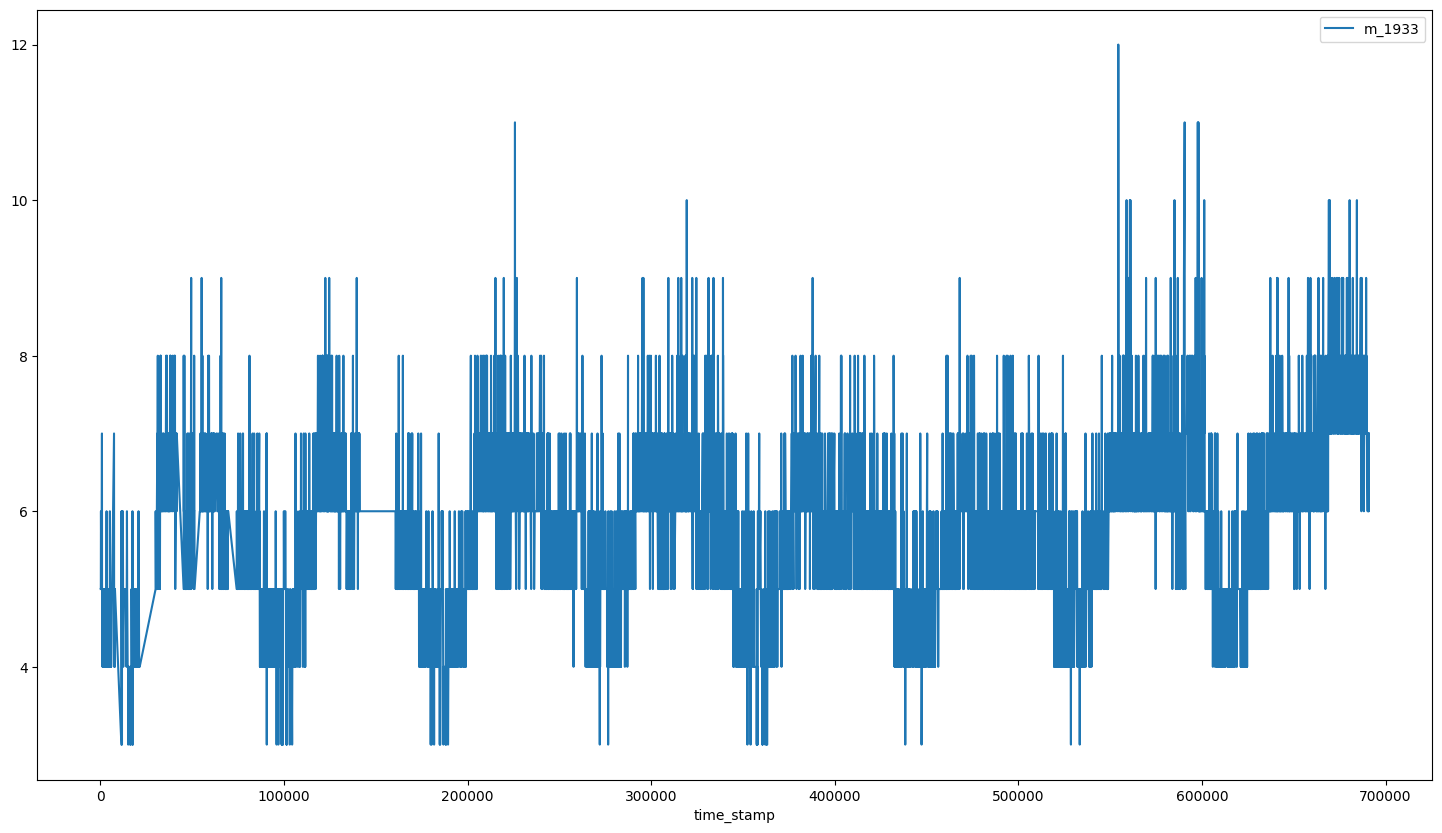

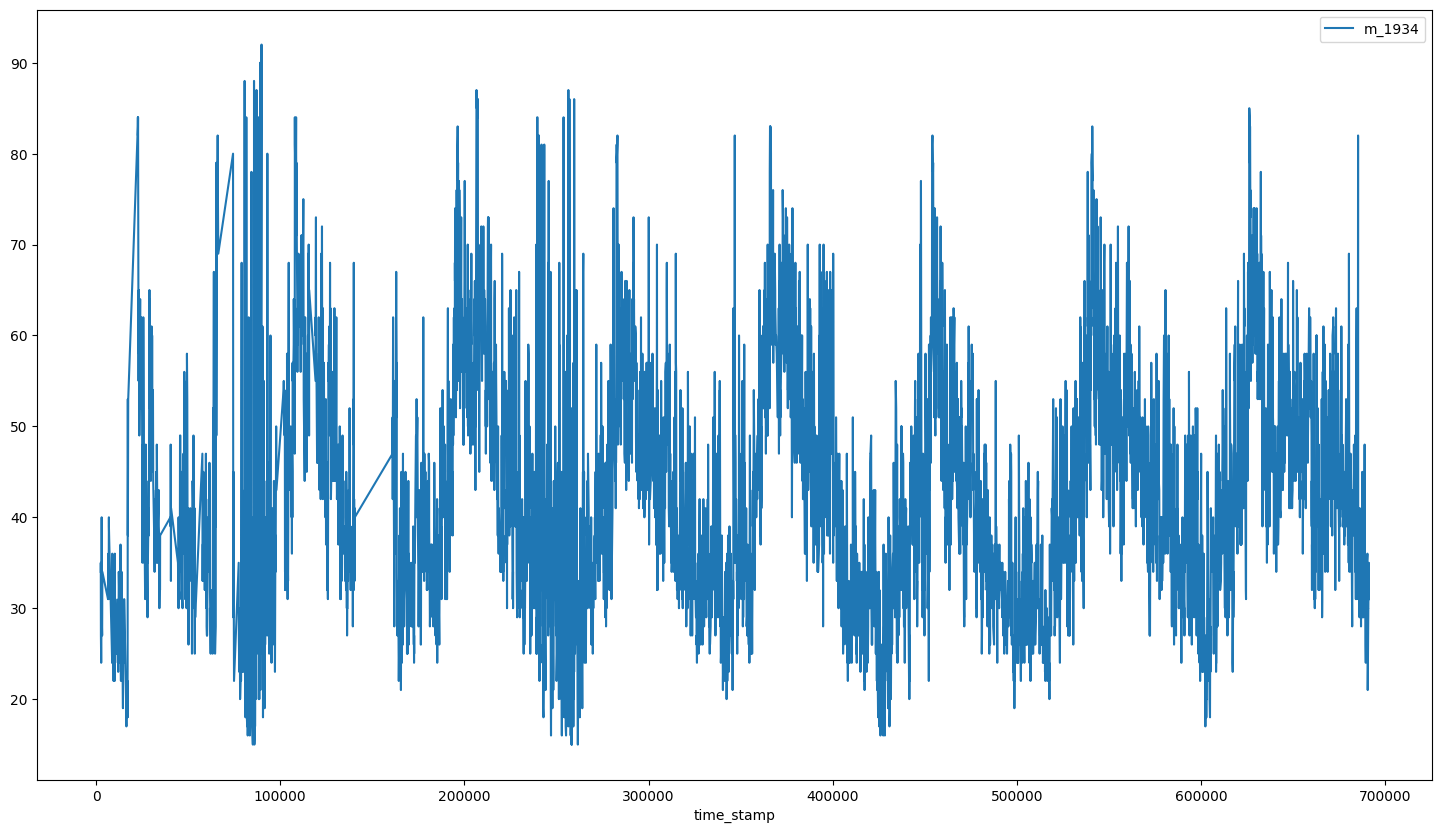

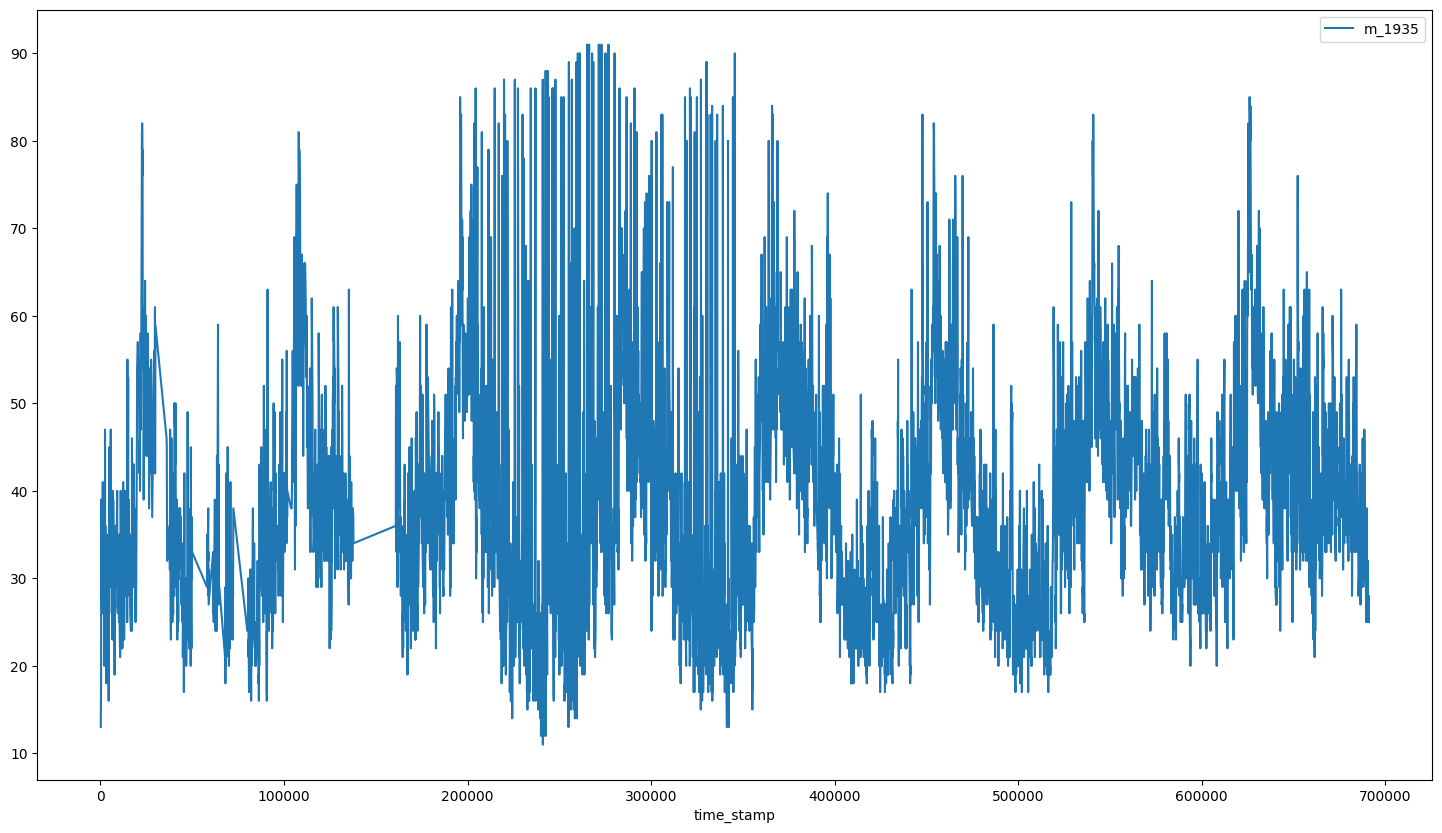

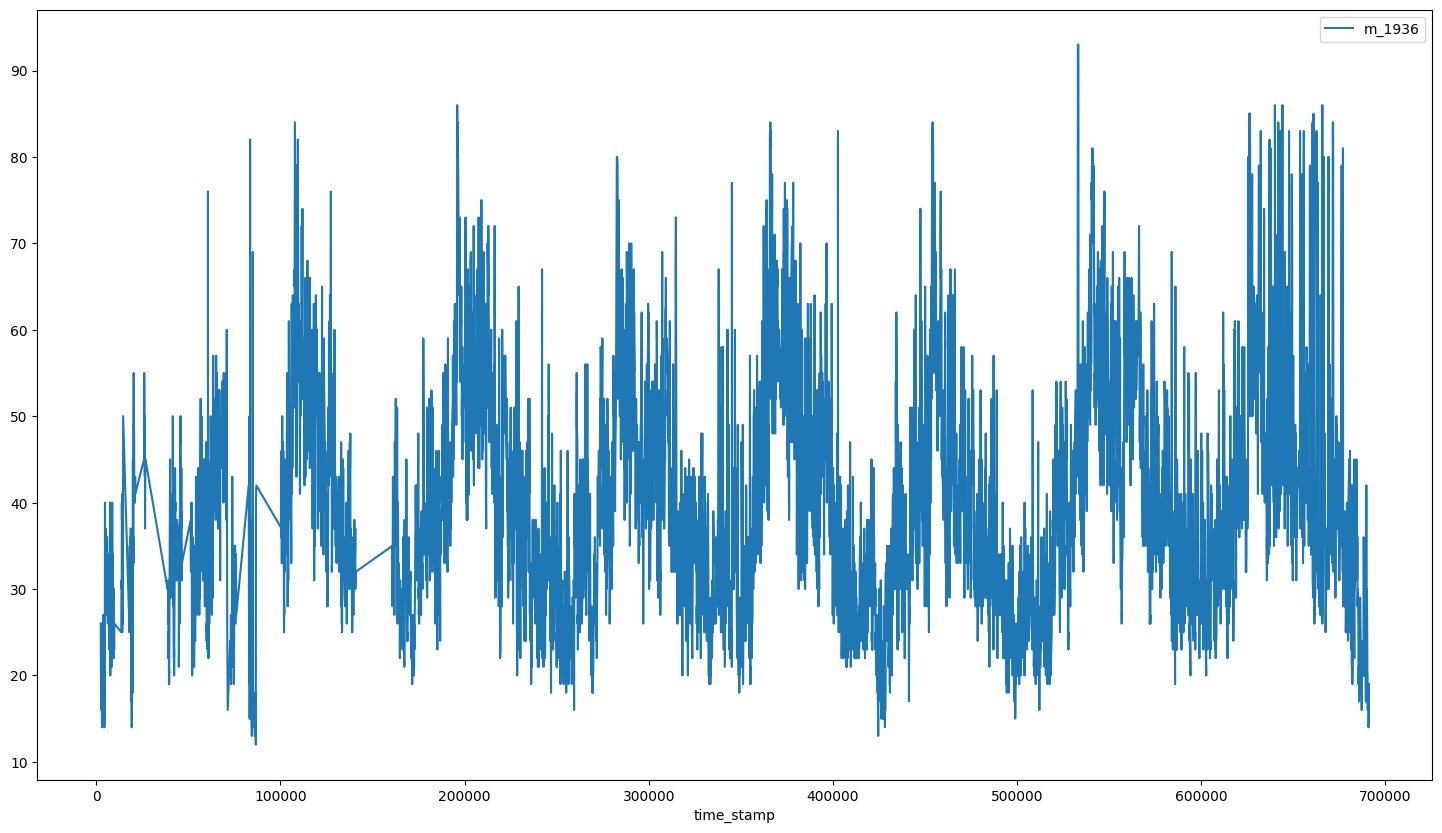

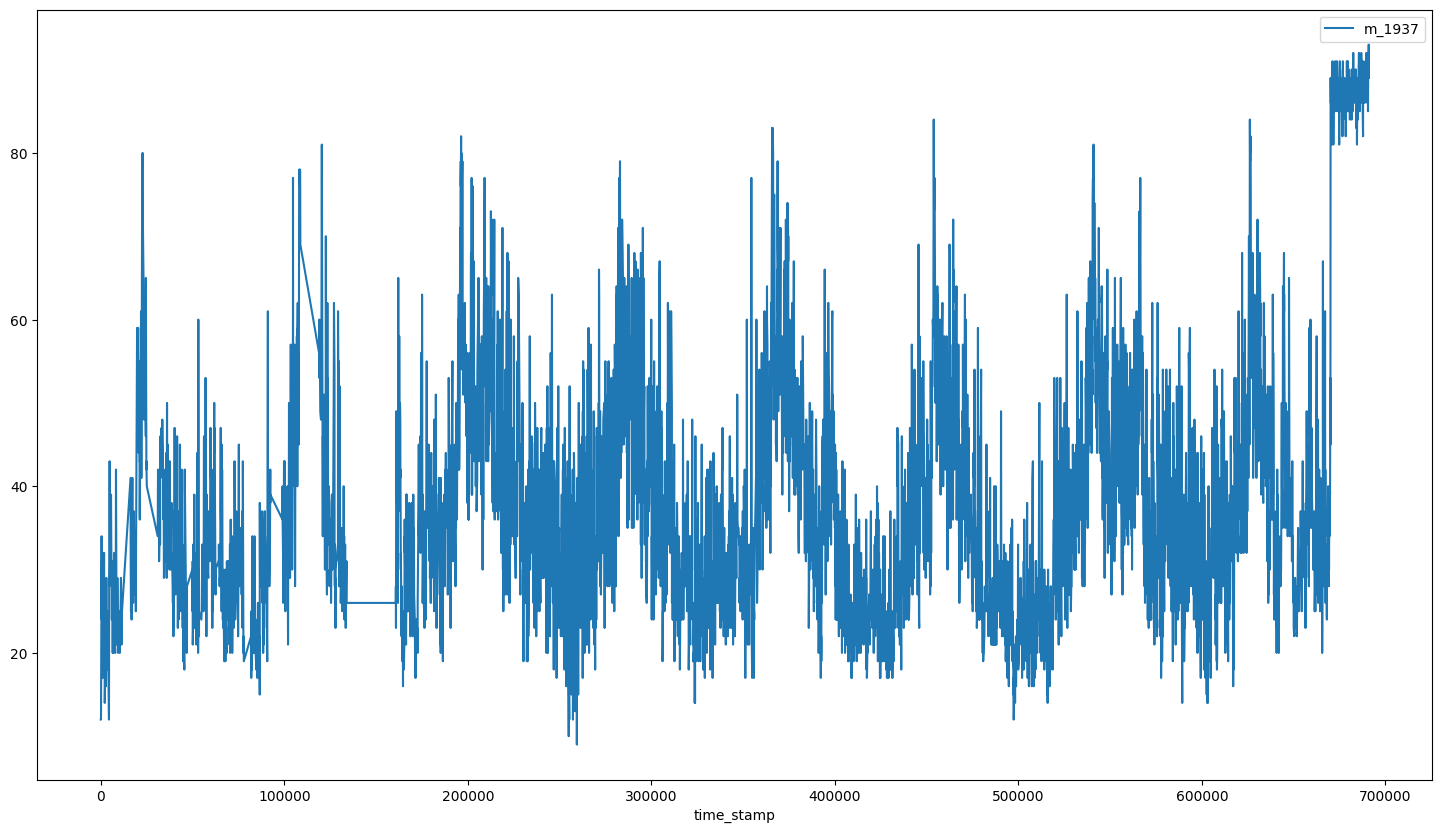

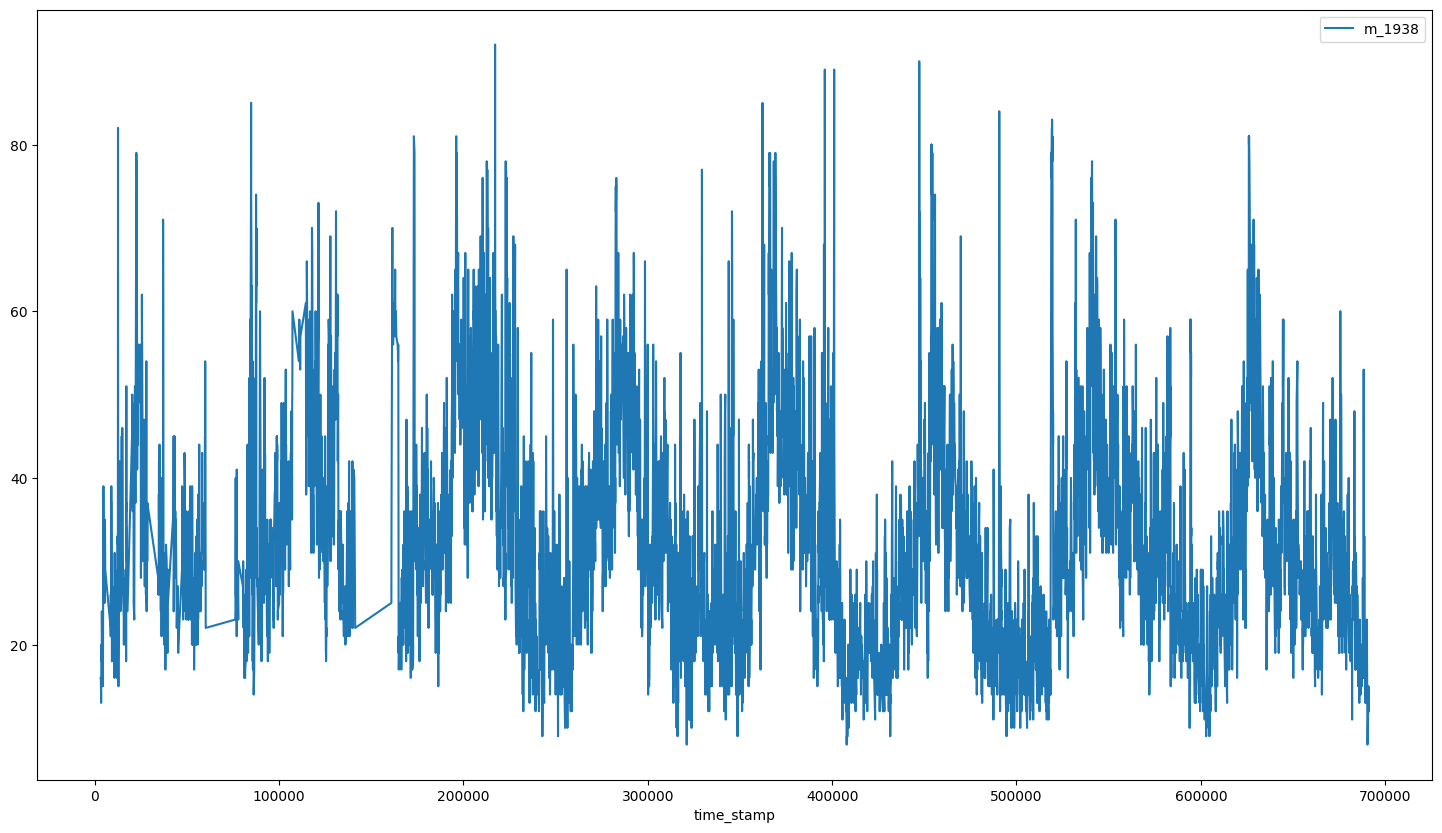

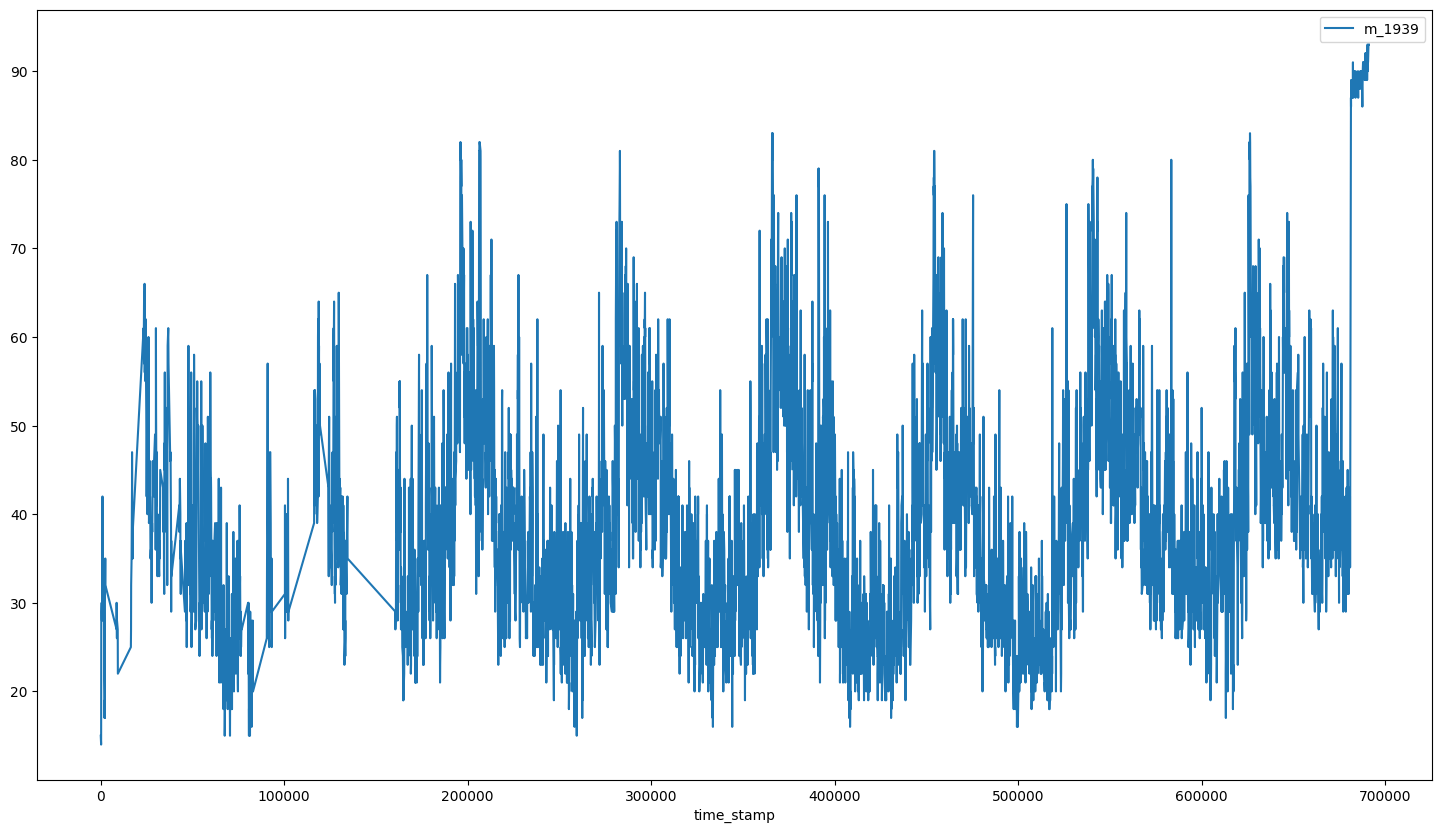

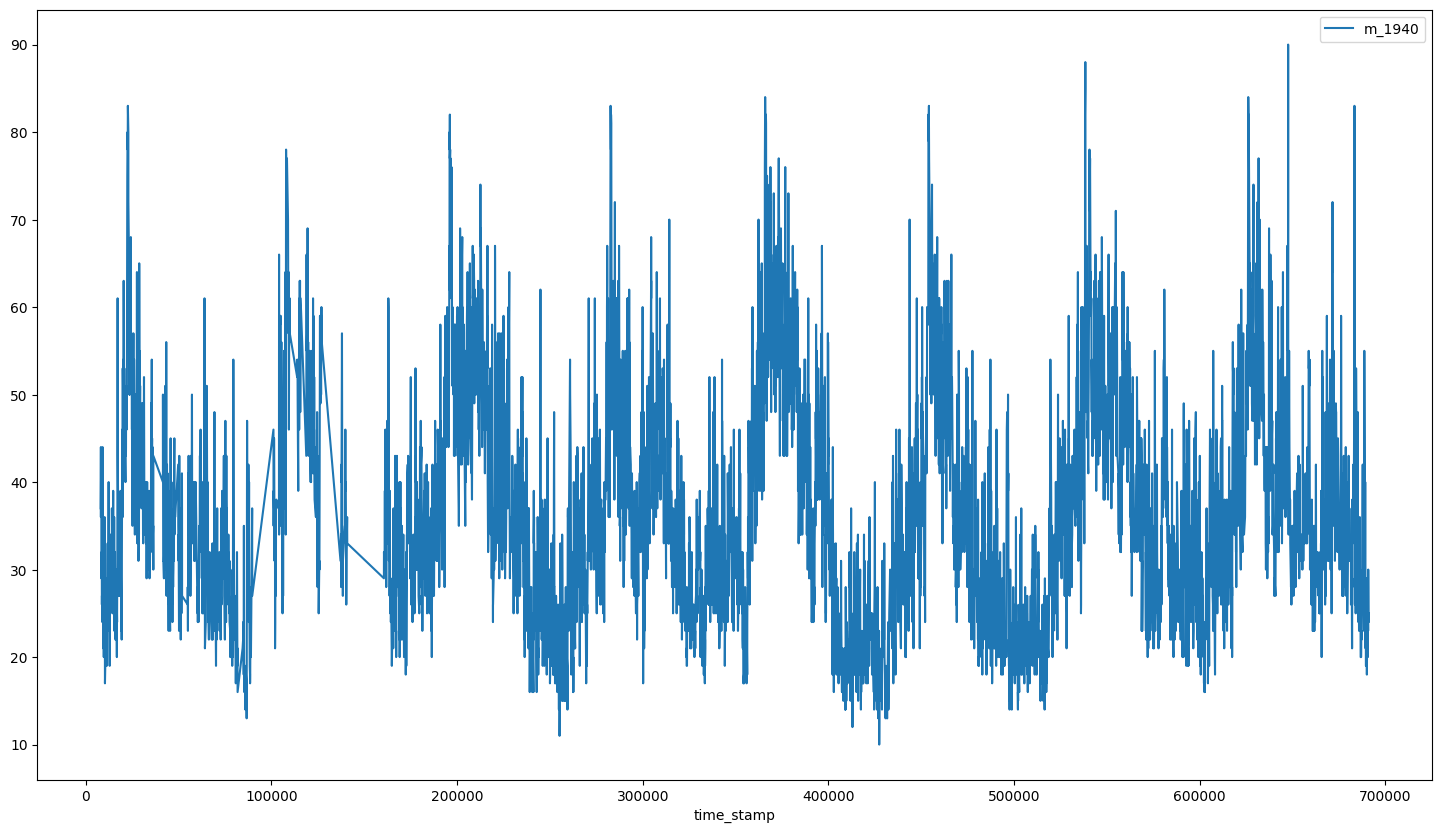

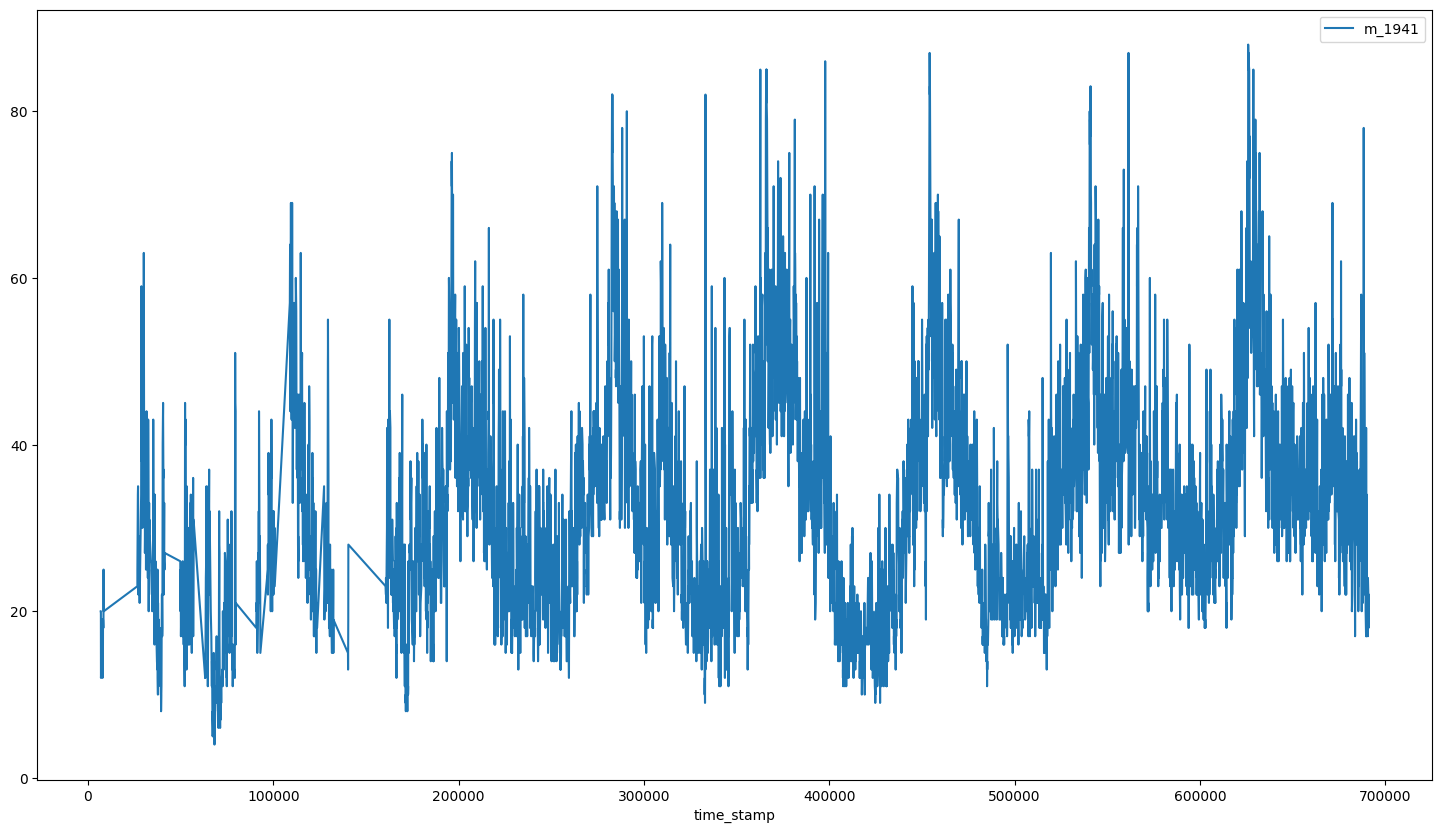

In [44]:
fig, ax = plt.subplots(figsize=(18, 10))

for key, grp in dfs.items():
  ax = grp.plot(ax=ax, kind='line', x="time_stamp", y="cpu_util_percent", label=key)
  grp.plot(x="time_stamp", y="cpu_util_percent", label=key, figsize=(18, 10))

plt.legend(loc='best')
plt.show()

In [79]:
# Resample the timestamps so they are evenly spaced apart and use interpolation to fill in values

for key in dfs:
    dfs[key].set_index('time_stamp', inplace=True)
    timeStampResampled = np.linspace(start=400_000, stop=600_000, num=2001)
    dfs[key] = dfs[key].reindex(dfs[key].index.union(timeStampResampled)).interpolate('values').loc[timeStampResampled]
    print(key + ":")
    print(dfs[key].head())
    print()



m_1932:
            cpu_util_percent
time_stamp                  
400000.0           36.444444
400100.0           33.750000
400200.0           31.250000
400300.0           35.600000
400400.0           34.800000

m_1933:
            cpu_util_percent
time_stamp                  
400000.0            5.240000
400100.0            5.000000
400200.0            5.470588
400300.0            5.923077
400400.0            5.153846

m_1934:
            cpu_util_percent
time_stamp                  
400000.0           46.800000
400100.0           43.857143
400200.0           52.000000
400300.0           54.500000
400400.0           39.750000

m_1935:
            cpu_util_percent
time_stamp                  
400000.0           40.863636
400100.0           39.500000
400200.0           37.833333
400300.0           38.875000
400400.0           38.000000

m_1936:
            cpu_util_percent
time_stamp                  
400000.0           38.200000
400100.0           39.636364
400200.0           33.000000

In [81]:
# Change the timestamps to regular steps (i.e. starting from 0 with step size of 1)

for key in dfs:
    dfs[key]["time_step"] = np.arange(grp.shape[0])
    print(key + ":")
    print(dfs[key].head())
    print()


m_1932:
            cpu_util_percent  time_step
time_stamp                             
400000.0           36.444444          0
400100.0           33.750000          1
400200.0           31.250000          2
400300.0           35.600000          3
400400.0           34.800000          4

m_1933:
            cpu_util_percent  time_step
time_stamp                             
400000.0            5.240000          0
400100.0            5.000000          1
400200.0            5.470588          2
400300.0            5.923077          3
400400.0            5.153846          4

m_1934:
            cpu_util_percent  time_step
time_stamp                             
400000.0           46.800000          0
400100.0           43.857143          1
400200.0           52.000000          2
400300.0           54.500000          3
400400.0           39.750000          4

m_1935:
            cpu_util_percent  time_step
time_stamp                             
400000.0           40.863636          0
40010

In [83]:
for key in dfs:
    dfs[key].set_index("time_step", inplace=True)
    print(key + ":")
    print(dfs[key].head())
    print()

m_1932:
           cpu_util_percent
time_step                  
0                 36.444444
1                 33.750000
2                 31.250000
3                 35.600000
4                 34.800000

m_1933:
           cpu_util_percent
time_step                  
0                  5.240000
1                  5.000000
2                  5.470588
3                  5.923077
4                  5.153846

m_1934:
           cpu_util_percent
time_step                  
0                 46.800000
1                 43.857143
2                 52.000000
3                 54.500000
4                 39.750000

m_1935:
           cpu_util_percent
time_step                  
0                 40.863636
1                 39.500000
2                 37.833333
3                 38.875000
4                 38.000000

m_1936:
           cpu_util_percent
time_step                  
0                 38.200000
1                 39.636364
2                 33.000000
3                 31.500000
4   

In [84]:
# Write dataframes of each machine to files:
import os
os.makedirs('./machine_data/', exist_ok=True)

for key in dfs:
  dfs[key].to_csv(f"./machine_data/{key}.csv")